# Notebook Example 1

In this example we use the iris dataset from the sklearn datasets and we import pandas to handle the preparation of a suitable data structure for machine learning and we use matplotlib to plot the evolutionary performance.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from zuffy.zuffy import ZuffyClassifier, functions, visuals
from zuffy.zuffy.wrapper import ZuffyFitIterator

In [4]:
iris = load_iris()
dataset = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dataset['target'] = iris.target
targetNames = iris.target_names
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

Having loaded our data we will first convert the crisp values of the features (e.g. petal width) into fuzzy sets using the fuzzify_data function.  This will return a new collection of data representing fuzzy versions of each feature.

Next we instruct our ZuffyClassifier to use 15 generations of evolution on our fuzzy pattern trees and turn on verbosity to show us the evolution process.

Finally we use ZuffyFitIterator to run the evolution three times using a 75/25% train/test split on our data.  Zuffy will use the default population size.

In [5]:
fuzzy_X, fuzzy_features_names = functions.fuzzify_data(X)
zuffy = ZuffyClassifier(generations=15, verbose=1)
res = ZuffyFitIterator(zuffy, fuzzy_X, y, n_iter=3, split_at=0.25)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.26         0.818417        3         0.583487              N/A      4.99s
   1     6.53         0.701579        5         0.582126              N/A      5.58s
   2     2.73         0.694438        3         0.582126              N/A      5.71s
   3     1.05         0.585774        3         0.582126              N/A      5.46s
   4     1.04         0.585682        1         0.583487              N/A      2.54s
   5     1.03         0.584045        1         0.583487              N/A      3.78s
   6     1.02         0.586535        1         0.583487              N/A      3.89s
   7     1.04         0.586871        1         0.583487              N/A      3.80s
   8     1.03         0.585957        1         0.583487              N/A  

The plot_evolution function will show the tree length, fitness and duration of each epoch for each target class in our dataset.

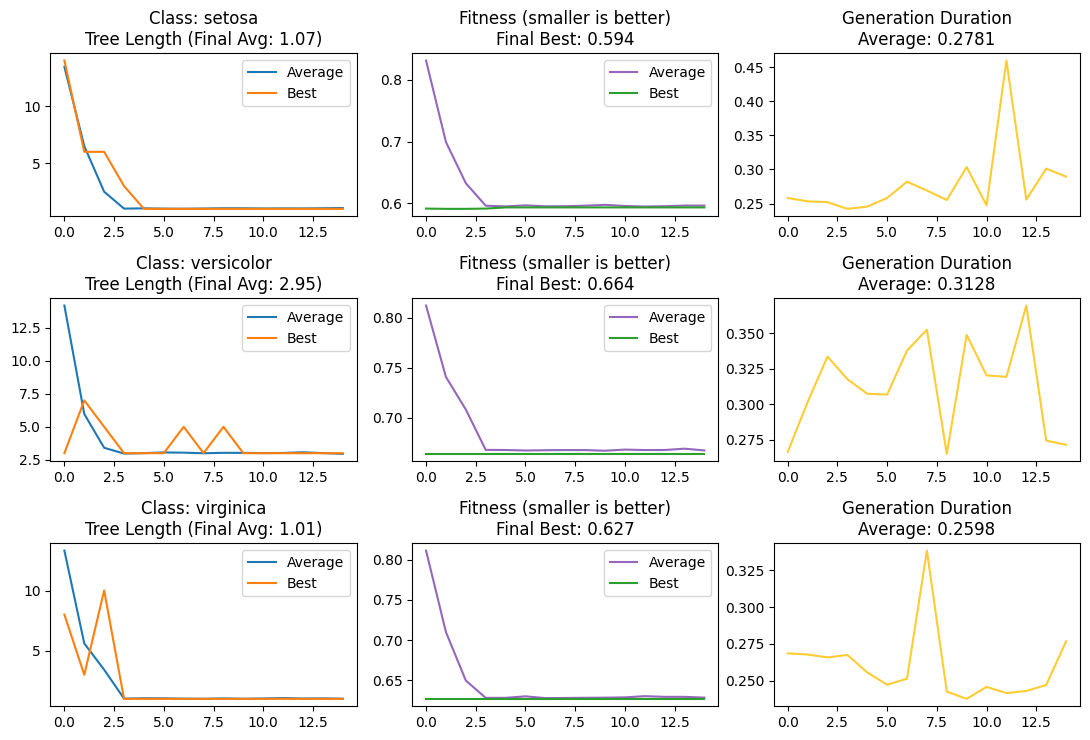

In [6]:
visuals.plot_evolution(
    res.getBestEstimator(),
    targetNames,
    res.getPerformance(),
    outputFilename='sample1_analysis')

The graphviz_tree function will generate an SVG file containing a graphical represention of our best Fuzzy Pattern Tree. This is annotated to show the fuzzified range of our new fuzzy features and the tree can be used to explain our proposed classification process.

In [ ]:
out, graph = visuals.graphviz_tree(
    res.getBestEstimator(),
    targetClassNames=targetNames,
    featureNames=fuzzy_features_names,
    treeName=f"Iris Dataset (best accuracy: {res.getBestScore():.3f})",
    outputFilename='sample1')
plt.show()

In [8]:
graph.render(format='svg', view=True, cleanup=True)

'sample1.svg'